In [114]:
%reload_ext autoreload
%autoreload 2

In [115]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.constants import hbar, pi

from mcbec3d import BoseGas3d
from mcsample import canonical_sampling

# Sodium values
mass = 3.8192397919999996e-26
sclength = 2.751721495484e-09 # F=1, mF=-1

omega = 2*pi*10
a_ho = np.sqrt(hbar/mass/omega)

AR = 4 # aspect ratio

g_int = 4*pi*sclength/a_ho #normalized interaction

In [116]:
sclength/a_ho

0.0004150924143715271

In [117]:
def mu1_N(N): # normalized 3D Thomas-Fermi chemical potential
    return .5*(15*N*sclength/a_ho/AR)**(2./5)

def psi_TF(X,Y,Z, N):
    return np.sqrt(np.maximum(0, (mu1_N(N) - X**2/2 - Y**2/2 - Z**2/2)/g_int))

In [122]:
def approx_TF(N, K):
    mu1 = mu1_N(N)
    C0 = np.zeros((K,), dtype=np.complex)
    k0 = int(np.ceil(mu1))
    for k in range(0,k0+1,2):
        C0[k, ] = 1 - (k/k0)**0.7
    return C0
    

K = 15
N = 50000
beta = 1./60

P = BoseGas3d(cutoff=K, Natoms=N, g_int=g_int, beta=beta, aspect_ratio=AR, step=0.5)
# P.state = P.renormalize(approx_TF(N, K))

set initial MC step h: 0.5


In [123]:
mu1_N(N)

2.8538321875242008

In [124]:
np.sqrt(2*mu1_N(N))

2.3890718647726783

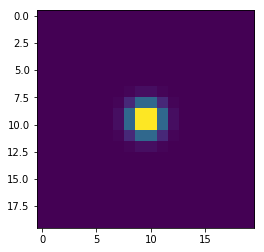

In [125]:
x = np.linspace(-7, 7, 20)

n0 = np.abs(P.to_space(P.state, x, x, x))**2

plt.imshow(n0.sum(1))

In [126]:
ID = 'bose3d'
print('MC sampling start')
P, E, ensamble, et = canonical_sampling(P, ID, beta, n_ensamble=1000)
print('MC sampling end (elapsed time: %.1f s)' % et)
print('Initial energy: %f' % E[0])
print('Final energy:   %f' % E[-1])

ens_c = np.asarray(ensamble)

MC sampling start
MC sampling end (elapsed time: 12.5 s)
Initial energy: 5845430.104148
Final energy:   5844964.122003


In [127]:
logfile = 'log_ensamble_%s.dat' % ID
print(logfile)
energy, acceptance, step = np.genfromtxt(logfile, skip_header=6, skip_footer=2, delimiter=None, unpack=True)

log_ensamble_bose3d.dat


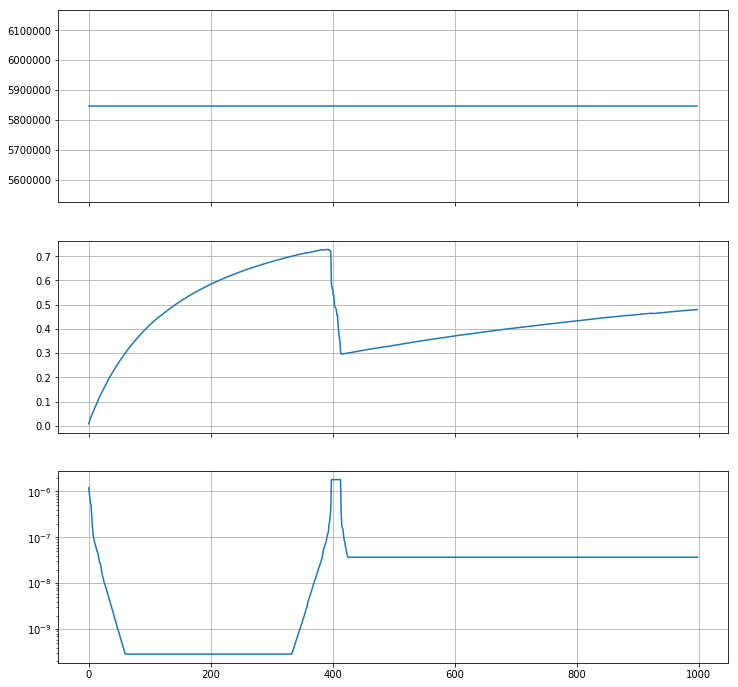

In [128]:
fig, (a1, a2, a3) = plt.subplots(3,1, figsize=(12,12), sharex=True)

sel = slice(0, None)
a1.plot(energy[sel])
a2.plot(acceptance[sel])
a3.semilogy(step[sel])
a1.grid()
a2.grid()
a3.grid()

In [111]:
psi = P.to_space(ens_c[400:], x, x, x, broadcast=True)

n_mean = np.mean(np.abs(psi)**2, axis=0)

In [112]:
n_mean.shape

(20, 20, 20)

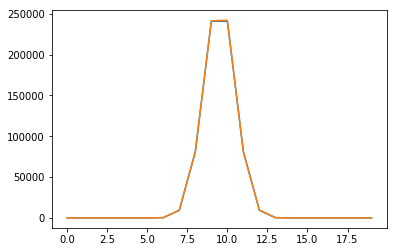

In [113]:
# plt.plot(x, n_TF)
plt.plot(n0.sum((1,2)))
plt.plot(n_mean.sum((1,2)))

